¡Hola, Andrea!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:




<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola, Andrea! Has hecho un excelente trabajo al realizar con el desarrollo del proyecto, realizas un tratamiento inicial a los datos, el filtro de estos y las pruebas indicadas. Solamente te dejo algunos comentarios para terminar de complementar el análisis

Sigue con el excelente trabajo!
</div>

# Pruebas A/B

El objetivo del estudio es evaluar si el nuevo sistema de recomendaciones genera una mayor conversión en cada etapa del embudo - product_page -> product_cart -> purchase en al menos 10% en los primeros 14 días posteriores a la inscripción de nuevos usuarios. Para probar esta hipótesis, se realizará una prueba A/B que compruebe la significancia estadística de la prueba de proporciones.


## 1. Análisis exploratiorio

In [1]:

import pandas as pd

marketing_events = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")

all_users = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")
events = pd.read_csv("/datasets/final_ab_events_upd_us.csv")
test_participants = pd.read_csv("/datasets/final_ab_participants_upd_us.csv")

datasets = [marketing_events, all_users, events, test_participants]

for df in datasets:
    df.info()
    print()
    print(df.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes

                               name                   regions    start_dt  \
0          Christmas&New Year Promo             EU, N.America  2020-12-25   
1      St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2            St. Patric's Day Promo             EU, N.America  2020-03-17   
3                      Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4                 4th of July Promo                 N.America  2020-07-04   
5         Black Friday Ads Campaign  EU, CIS, APAC, N.America  2020-11-26   
6            Chinese New Year Promo                      APAC  2020-01-25   
7 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## 1.1 Transformación de tipo de datos

In [2]:

# Transformar tipo de datos

# Dataframe 1: marketing_events


print(marketing_events["name"].unique())
print(marketing_events["regions"].unique())

# Convertir tipos básicos
marketing_events["name"] = marketing_events["name"].astype(str)
marketing_events["regions"] = marketing_events["regions"].astype(str)
marketing_events["start_dt"] = pd.to_datetime(marketing_events["start_dt"], errors="coerce")
marketing_events["finish_dt"] = pd.to_datetime(marketing_events["finish_dt"], errors="coerce")

# --- Transformación de regiones ---
# 1. Quitar espacios innecesarios
marketing_events["regions"] = marketing_events["regions"].str.strip()

# 2. Dividir por coma → listas
marketing_events["region_split"] = marketing_events["regions"].str.split(", ")

# 3. Explode → una fila por región
marketing_events_exploded = marketing_events.explode("region_split").rename(
    columns={"region_split": "region"}
)

# 4. Conteo rápido de eventos por región
print("\nEventos por región:")
print(marketing_events_exploded["region"].value_counts())

marketing_events_exploded.info()
print(marketing_events_exploded.head())

# Dataframe 2: all_users

all_users["first_date"] = pd.to_datetime(all_users["first_date"], errors="coerce")

all_users.info()
print(all_users.head())

# Dataframe 3: events


events["event_dt"] = pd.to_datetime(events["event_dt"], errors="coerce")

events = events.rename(columns={"details": "purchase_usd"})
events.info()
print(events.head())

# Dataframe 4:  test_participants

print(test_participants["ab_test"].unique())


['Christmas&New Year Promo' "St. Valentine's Day Giveaway"
 "St. Patric's Day Promo" 'Easter Promo' '4th of July Promo'
 'Black Friday Ads Campaign' 'Chinese New Year Promo'
 'Labor day (May 1st) Ads Campaign' "International Women's Day Promo"
 'Victory Day CIS (May 9th) Event' 'CIS New Year Gift Lottery'
 'Dragon Boat Festival Giveaway' "Single's Day Gift Promo"
 'Chinese Moon Festival']
['EU, N.America' 'EU, CIS, APAC, N.America' 'N.America' 'APAC'
 'EU, CIS, APAC' 'CIS']

Eventos por región:
APAC         9
EU           7
CIS          7
N.America    6
Name: region, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       29 non-null     object        
 1   regions    29 non-null     object        
 2   start_dt   29 non-null     datetime64[ns]
 3   finish_dt  29 non-null     datetime64[ns]
 4   region     29 non-null  

## 1.2 Valores ausentes & duplicados

In [3]:

# Resumen simple de ausentes y duplicados

datasets = {
    "marketing_events": marketing_events_exploded,
    "all_users": all_users,
    "events": events,
    "test_participants": test_participants
}

for name, df in datasets.items():
    print(f"\n*** {name} ***")
    print("Shape:", df.shape)
    print("Valores ausentes por columna:")
    print(df.isna().sum())
    print("Duplicados (filas completas):", df.duplicated().sum())



*** marketing_events ***
Shape: (29, 5)
Valores ausentes por columna:
name         0
regions      0
start_dt     0
finish_dt    0
region       0
dtype: int64
Duplicados (filas completas): 0

*** all_users ***
Shape: (58703, 4)
Valores ausentes por columna:
user_id       0
first_date    0
region        0
device        0
dtype: int64
Duplicados (filas completas): 0

*** events ***
Shape: (423761, 4)
Valores ausentes por columna:
user_id              0
event_dt             0
event_name           0
purchase_usd    363447
dtype: int64
Duplicados (filas completas): 0

*** test_participants ***
Shape: (14525, 3)
Valores ausentes por columna:
user_id    0
group      0
ab_test    0
dtype: int64
Duplicados (filas completas): 0


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
E
xcelente trabajo,   solamente antes de proceder con el análisi debemos de realizar los siguientes filtros que nos mencionan en el proyecto:
    
    - Agregar un filtro de los eventos de marketing aplicables a la region "UE", dado que con base en el ejercicio son los eventos de análisis.
    - verificar que las fechas de aplicación corresponden con lo que indica el ejercicio (fechas entre 2020-12-07 y 2021-01-01)
    - Verificar que consideramos los primeros 14 días desde que se registraron los usuarios

</div>


<div class="alert alert-block alert-info">
<b>Hola Tonatiuh, pasé el filtro por región y la ventana de 14 días tras la inscripción de un usuario considerando las fechas de inicio y fin de la prueba antes de analizar la conversión entre etapas del embudo</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el ajuste!

## 1.3 Conversión en etapas del embudo

Etapas del embudo:
login           9919
product_page    6132
purchase        2998
product_cart    2903
Name: event_name, dtype: int64

** Conversión entre etapas del embudo **
          stage  users  conv_over_base_%  conv_from_prev_%
0         login   3480            100.00               NaN
1  product_page   2178             62.59             62.59
2  product_cart   1026             29.48             47.11
3      purchase   1082             31.09            105.46

** Distribución del número de eventos por usuario entre A y B **
      event_name                                              
           count      mean       std  min  25%  50%  75%   max
group                                                         
A         2604.0  6.619432  3.667608  1.0  4.0  6.0  9.0  24.0
B          877.0  5.376283  3.228340  1.0  3.0  4.0  7.0  24.0

** Usuarios presentes en ambos grupos **
Usuarios en ambos grupos: 0

** Distribución de eventos por día **
event_date
2020-12-07     674
2020-12-0

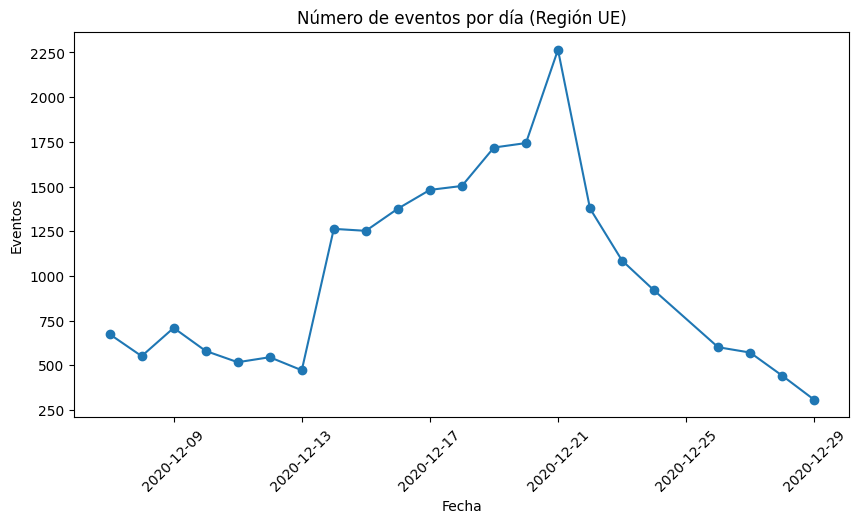

In [7]:
### FILTRO POR REGIÓN + VENTANA DE 14 DÍAS POSTERIORES A LA INSCRIPCIÓN (CONSIDERANDO FECHAS DE INICIO Y FIN DE LA PRUEBA) ANTES DEL ANÁLISIS DE CONVERSIÓN

test_start = pd.Timestamp("2020-12-07")
enroll_end = pd.Timestamp("2020-12-21")
test_end = pd.Timestamp("2021-01-01")  # límite superior exclusivo

# Filtrar solo usuarios en la región "EU" y eliminar usuarios presentes en ambos grupos

users_clean = test_participants.query("ab_test == 'recommender_system_test'") # filtramos usuarios que participan en la prueba siendo ejecutada
eu_ids = set(all_users.loc[
    (all_users["region"] == "EU") & # filtramos región
    (all_users["first_date"] >= test_start) & #seleccionamos usuarios inscritos al iniciar la prueba
    (all_users["first_date"] <= enroll_end), # usuarios inscritos antes de que se dejaran de aceptar nuevos usuarios
    "user_id"] # seleccionamos todos los user_id que pertenecen a la región
            )  
users_clean = users_clean[users_clean["user_id"].isin(eu_ids)] # filtramos para que solamente se queden user_id de la región
grp_counts = users_clean.groupby("user_id")["group"].nunique() # agrupamos participantes de la región UE por user_id y contamos en cuántos grupos están (A/B/ambos)
overlap_ids = grp_counts[grp_counts > 1].index #si grp_counts es >1 significa que está presente en A & B. Seleccionamos el índice (user_id) para esos usuarios
users_clean = users_clean[~users_clean["user_id"].isin(overlap_ids)] # mantenemos unicamente usuarios presentes en un solo grupo

# Total de usuarios por grupo

users_by_group = users_clean.groupby("group")["user_id"].nunique()
totalgroup_A, totalgroup_B = int(users_by_group["A"]), int(users_by_group["B"]) 


# Ventana de 14 días 

events_by_user = events.merge(users_clean[["user_id", "group"]], on="user_id", how="inner") # unir usuarios filtrados con eventos
events_by_user = events_by_user.merge(all_users[["user_id", "first_date"]], on="user_id", how="left") # añade fecha de registro
events_by_user = events_by_user[
    (events_by_user["event_dt"] >= events_by_user["first_date"]) &
    (events_by_user["event_dt"] <= events_by_user["first_date"] + pd.Timedelta(days=14)) &
    (events_by_user["event_dt"] >= test_start) &
    (events_by_user["event_dt"] <  test_end)
].copy()


# Etapas del embudo

print("Etapas del embudo:")
print(events_by_user["event_name"].value_counts())



import seaborn as sns
import matplotlib.pyplot as plt

# 1) Conversión en las diferentes etapas del embudo
print("\n** Conversión entre etapas del embudo **")

funnel_stages = ["login", "product_page", "product_cart", "purchase"]
#calculamos usuarios base, filtramos por "login" y contamos usuarios unicos
base_users = events_by_user.loc[events_by_user["event_name"] == "login", "user_id"].nunique()
# creamos diccionario "etapa: usuarios unicos" para cada etapa 
stage_users = {
    stage: events_by_user.loc[events_by_user["event_name"] == stage, "user_id"].nunique()
    for stage in funnel_stages
} 


# Construir tabla del embudo
rows = [] # contador
prev = None #no existe etapa previa a "login"
for stage in funnel_stages:
    users = stage_users[stage] # usuarios unicos por etapa
    conv_base = 0 if base_users == 0 else users / base_users # conversión sobre la base, establecemos condcición "0 if base_users==0" para evitar ZeroDivisionError
    conv_prev = None if prev is None else (0 if prev == 0 else users / prev) #conversión sobre la etapa anterior
    #si prev = 0, estamos en login, establece None. Para las demás etapas: users/prev
    prev = users # guarda el numero de usuarios de cada etapa
    rows.append({
        "stage": stage,
        "users": users,
        "conv_over_base_%": round(conv_base * 100, 2),
        "conv_from_prev_%": None if conv_prev is None else round(conv_prev * 100, 2)
    })

funnel_df = pd.DataFrame(rows)
print(funnel_df)


# 2) ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?

print("\n** Distribución del número de eventos por usuario entre A y B **")

events_participants = events_by_user.copy()
events_per_user = events_participants.groupby(["group","user_id"])["event_name"].count().reset_index()
print(events_per_user.groupby("group").describe())



# 3) ¿Hay usuarios que están presentes en ambas muestras?

print("\n** Usuarios presentes en ambos grupos **")

users_grouped = users_clean.groupby("user_id")["group"].nunique() #agrupar por user_id y contamos cuantos valores distintos de group (A/B) tiene
both_groups = (users_grouped > 1).sum() # si es >1 aparece en ambos grupos
print(f"Usuarios en ambos grupos: {both_groups}")


# 4) ¿Cómo se distribuye el número de eventos entre los días?
print("\n** Distribución de eventos por día **")

events_by_user["event_date"] = events_by_user["event_dt"].dt.date

daily_events = events_by_user.groupby("event_date")["user_id"].count()
print(daily_events.head(20))

plt.figure(figsize=(10,5))
daily_events.plot(kind="line", marker="o")
plt.title("Número de eventos por día (Región UE)")
plt.ylabel("Eventos")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.show()





### Pecularidades en los datos:

Tras filtrar a los usuarios por la región sujeta al experimento (UE), el análisis exploratorio permitió identificar varias características relevantes de los datos. En primer lugar, el número de eventos por usuario no se distribuye equitativamente entre las muestras: el grupo A es más grande y presenta una mayor media de eventos que el grupo B. Tras la limpieza, se confirmó que no existen usuarios presentes en ambos grupos, garantizando la validez del experimento. La distribución de eventos por día mostró picos significativos entre el 14 y el 21 de diciembre, alcanzando un máximo el 21 (coincidiendo con el cierre de inscripciones), seguido de una disminución marcada en los días posteriores, probablemente asociada a factores estacionales como las festividades navideñas. Finalmente, llama la atención que al calcular la conversión de usuarios entre etapas del embudo, identificamos que hay más usuarios que hacen una compra que los usuarios que agregaron un producto al carrito. Esto indica que el embudo no es perfecto y que puede haber fallas en la página. Por ejemplo, un usuario puede hacer un "quick checkout" y omitieron la etapa "product cart". 

## 2. Prueba A/B

In [6]:
from scipy import stats as st
import numpy as np
import math as mth


# Probar la hipotesis de que las proporciones son iguales

def ztest_proporciones(eventA, totalA, eventB, totalB, alpha):
    """
    Realiza prueba Z de dos proporciones para comparar las tasas de conversión
    entre dos grupos (A y B).

    Parámetros
    ----------
    eventA : usuarios del grupo A que tuvieron el evento 
    totalA : total de usuarios en el grupo A
    eventB : usuarios del grupo B que tuvieron el evento
    totalB : total de usuarios en el grupo B

    Return
    -------
    pA : Tasa de conversión (en la etapa) en el grupo A
    pB : asa de conversión (en la etapa) en el grupo B
    z : Estadístico de la prueba Z.
    pval : Valor p bilateral de la prueba.
    uplift : Compara la tasa de conversión de B respecto a A en %
    """
    
    pA = eventA / totalA 
    pB = eventB / totalB
    p_combined = (eventA + eventB) / (totalA + totalB)
    difference = pA - pB
    z = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/totalA + 1/totalB))
    # Usamos dist.cdf() para calcular el p-valor bilateral
    p_val = 2 * (1 - st.norm.cdf(abs(z)))
    B_vs_A = ((pB / pA) - 1) * 100
    if p_val < alpha:
        decision = "Rechazar H0. Hay una diferencia significativa entre las proporciones"
    else:
        decision = "No rechazar H0. No hay evidencia para pensar que las proporciones son diferentes"
    return pA, pB, z, p_val, B_vs_A, decision



# Evaluación por etapa 
alpha = 0.05
stages = ["product_page", "product_cart", "purchase"]
results = []

for event in stages:
    conteo = (
        events_by_user.loc[events_by_user["event_name"] == event]
          .groupby("group")["user_id"].nunique()
    )
    eventA, eventB = int(conteo["A"]), int(conteo["B"]) # número de usuarios de grupo A/B que pasaron por la etapa.
    
    pA, pB, z, p_val, B_vs_A, decision= ztest_proporciones(eventA, totalgroup_A, eventB, totalgroup_B, alpha)

    results.append({
        "Event": event,
        "Total_userA": totalgroup_A, "Total_userB": totalgroup_B,
        "Event_userA": eventA, "Event_userB": eventB,
        "Conversion_rateA": round(pA, 4), "Conversion_rateB": round(pB, 4),
        "Change B vs A (%)": round(B_vs_A, 2),
        "z_stat": round(z, 3), "p_value": round(p_val, 4),
        "Decision": decision
        
    })

ab_resultados = pd.DataFrame(results)
print(ab_resultados)

          Event  Total_userA  Total_userB  Event_userA  Event_userB  \
0  product_page         2604          877         1685          493   
1  product_cart         2604          877          782          244   
2      purchase         2604          877          833          249   

   Conversion_rateA  Conversion_rateB  Change B vs A (%)  z_stat  p_value  \
0            0.6471            0.5621             -13.13   4.495   0.0000   
1            0.3003            0.2782              -7.35   1.241   0.2147   
2            0.3199            0.2839             -11.24   1.991   0.0465   

                                            Decision  
0  Rechazar H0. Hay una diferencia significativa ...  
1  No rechazar H0. No hay evidencia para pensar q...  
2  Rechazar H0. Hay una diferencia significativa ...  



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el calculo de la z-score y con el desarrollo de la prueba de hipótesis. Solamente te recomiendo agregar una interpretación al z-score obtenido y al resultado del valor p de la prueba de hipótesis.





<div class="alert alert-block alert-info">
<b>Incluí una interpretación más detallada a los resultados del z-score y p-value</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el ajuste!

## 2.1 Análisis de resultados

El análisis estadístico de las proporciones mostró que las diferencias entre los grupos A (control) y B (nuevo embudo de pago) no cumplen con el resultado esperado del experimento (un aumento ≥10% en cada etapa del embudo). En la etapa product_page, el grupo B presentó una conversión significativamente menor que el grupo A (z = 4.50, p < 0.001), lo que indica un impacto negativo. En product_cart no se encontraron diferencias estadísticamente significativas entre los grupos (z = 1.24, p = 0.215), lo que sugiere un desempeño equivalente. En la etapa de purchase, aunque el valor de z = 1.99 y p = 0.046 señalan una diferencia marginalmente significativa, el efecto es también negativo para el grupo B. En conjunto, estos resultados sugieren que el nuevo embudo de pago no mejora la conversión en ninguna de las etapas analizadas; por el contrario, muestra indicios de un impacto desfavorable en la navegación de producto y en las compras.

Conclusión: El nuevo sistema de recomendaciones (embudo B) no aumenta las ventas. Al contrario, reduce significativamente la conversión en la tras registrarse y en la compra final. Por lo tanto, el embudo actual (A) es más eficiente y debería mantenerse. De igual forma, recordemos que al calcular la conversión de usuarios entre etapas del embudo, identificamos que hay más usuarios que hacen una compra que los usuarios que agregaron un producto al carrito. Esto indica que el embudo no es perfecto y que puede haber fallas en la página. Por ejemplo, es posible que un usuario haga directamente una compra sin agregar el producto al carrito. Por lo que se recomienda revisar el funcionamiento de cada etapa del embudo.


